In [35]:
import logging

import networkx as nx
from matplotlib import pyplot as plt

from broadcastStorm import Message, Node, Network

from util import sutup_logger, mean

In [2]:
logger = sutup_logger()

### Second task
2) розробити покращену модель за схемою "broadcast", яка не призводить до ефекту "broadcast storm";

Lets create random graph with 4 nodes

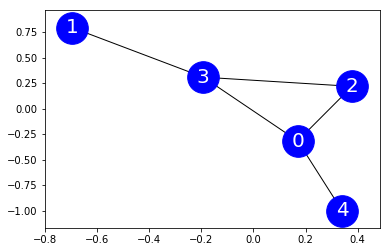

In [24]:
g = nx.gnp_random_graph(5,0.5)
pos = nx.spring_layout(g)
#nx.draw(g)

nx.draw_networkx_nodes(g, pos, node_color='b', node_size=1000)
nx.draw_networkx_labels(g, pos, font_color='w', font_size=20)
nx.draw_networkx_edges(g, pos)

plt.show()

Create a network with this graph

The Network class is already implemented with utility data structures that allow to avoid broadcast storm

To avoid broadcast storm we need to set equal to some big number, let it be infinity!

In [25]:
network = Network(g, logger, keep_history=float('inf'))

Lets send 2 messages using broadcast method of transferring

    from node 1 to node 4 and 

    from node 4 to node 2

In [26]:
msg1 = Message(0, ttl=1000, sender_id=4, dest_node_id=2)
msg2 = Message(1, ttl=1000, sender_id=1, dest_node_id=4)

network.add_message(msg1)
network.add_message(msg2)

We know that we are not going to overflow the network, so lets print system info after every step

In [27]:
network.logger.setLevel(logging.INFO)

Simulation:

In [28]:
n_msgs = 2

# lets store history of messages in the network
n_msgs_history = [n_msgs]

n_steps = 0

# while there are messages in the network
while n_msgs > 0:
    print("\n==================\nStep {}\n".format(n_steps))
    
    n_msgs = network.simulate_one_step()
    
    n_msgs_history.append(n_msgs)
    
    n_steps += 1
    print("Number of messages in the system after {} steps is {}".format(n_steps, n_msgs))


Step 0

There are 2 msgs in the network


previously node 0 received 0 messages

Node 0 didn't broadcast anything

There are 2 msgs in the network


previously node 1 received 1 messages

Node 1 is broadcasting msg with id 1 to node 3
node 3 received message with id 1 and visited node counter 0

Node 1 in total broadcasted 1 messages to 1 nodes

There are 2 msgs in the network


previously node 2 received 0 messages

Node 2 didn't broadcast anything

There are 2 msgs in the network


previously node 3 received 1 messages

Node 3 is broadcasting msg with id 1 to node 0
node 0 received message with id 1 and visited node counter 1

Node 3 is broadcasting msg with id 1 to node 1
node 1 received message with id 1 and visited node counter 1

Node 3 is broadcasting msg with id 1 to node 2
node 2 received message with id 1 and visited node counter 1

Node 3 in total broadcasted 1 messages to 3 nodes

There are 4 msgs in the network


previously node 4 received 1 messages

Node 4 is broadcasti

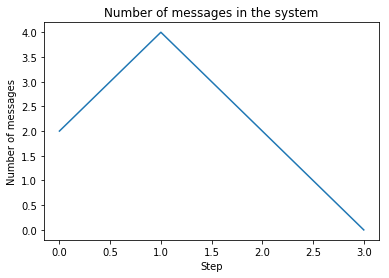

In [29]:
plt.plot(n_msgs_history)
plt.title("Number of messages in the system")
plt.xlabel("Step")
plt.ylabel("Number of messages")
plt.show()

In [32]:
print("On average it took {} hops to deliver a message".format(mean(network.hop_time)))

On average it took 2.5 hops to deliver a message


Which is true, because there are 3 nodes between 1 and 4 (including 4th node)
and there are 2 nodes between 4 and 2 (including 2)

$ {(3 + 2)\over{2}} = 2.5$